In [1]:
import pandas as pd
from views_dataviz import plot_dumbbell

In [2]:
?plot_dumbbell

Signature:
plot_dumbbell(
    df: pandas.core.frame.DataFrame,
    current: str,
    previous: str,
    labels: str,
    axislabel: str,
    title: str,
    orientation: str = 'vertical',
    markersize: int = 100,
    markercolors: Tuple[int, int] = ('black', 'red'),
    linecolor: str = 'grey',
    lims: Optional[Tuple[int, int]] = None,
    figsize: Tuple[float, float] = (10.0, 12.0),
    legend_kwds: Optional[Dict] = None,
    ascending: bool = False,
    path: Optional[str] = None,
)
Docstring:
Plots vertical or horizontal dumbbell chart for selected deltas.

Args:
    df: pd.DataFrame containing the current and previous series.
    current: Column name of current series.
    previous: Column name of previous series.
    labels: Column name of associated labels.
    axislabel: Label to give to the axis (x for vertical, y for horizontal).
    title: Title to the figure.
    orientation: String for orientation: "vertical" or "horizontal".
    markersize: Size of markers in scatter.


In [3]:
mock = pd.DataFrame(
    {
        "current": [1, 2, 3, 4.3],
        "previous": [0.8, 1.5, 1, 2],
        "labels": ["NL", "BE", "SE", "DK"],
    }
)

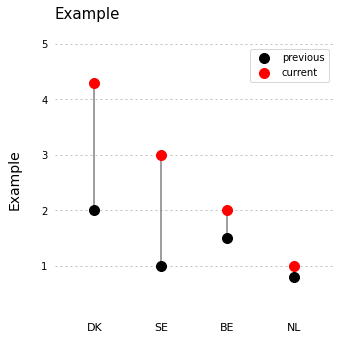

In [4]:
plot_dumbbell(
    df=mock, 
    current="current", 
    previous="previous", 
    labels="labels", 
    orientation="horizontal", 
    axislabel="Example", 
    title="Example", 
    figsize=(5,5)
)